## Classification Practice: fruit types:



https://www.edureka.co/blog/classification-in-machine-learning/ :How To Implement Classification In Machine Learning?

https://zhuanlan.zhihu.com/p/82114104: 一文读懂机器学习分类算法（简单版）


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
fruits = pd.read_table('fruit.txt')
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [3]:
fruits.isnull().any()

fruit_label      False
fruit_name       False
fruit_subtype    False
mass             False
width            False
height           False
color_score      False
dtype: bool

In [4]:
fruits.head()
print(fruits.groupby('fruit_name').size())

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [5]:
fruits.describe()
#need scaling

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fruit_name', ylabel='count'>

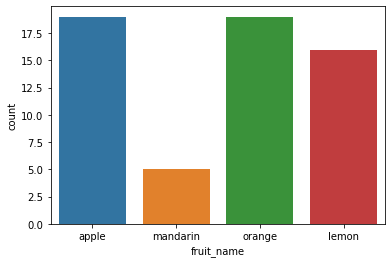

In [6]:
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

In [7]:
from pandas.plotting import scatter_matrix

Text(0.5, 0.98, 'Scatter-matrix of the variables')

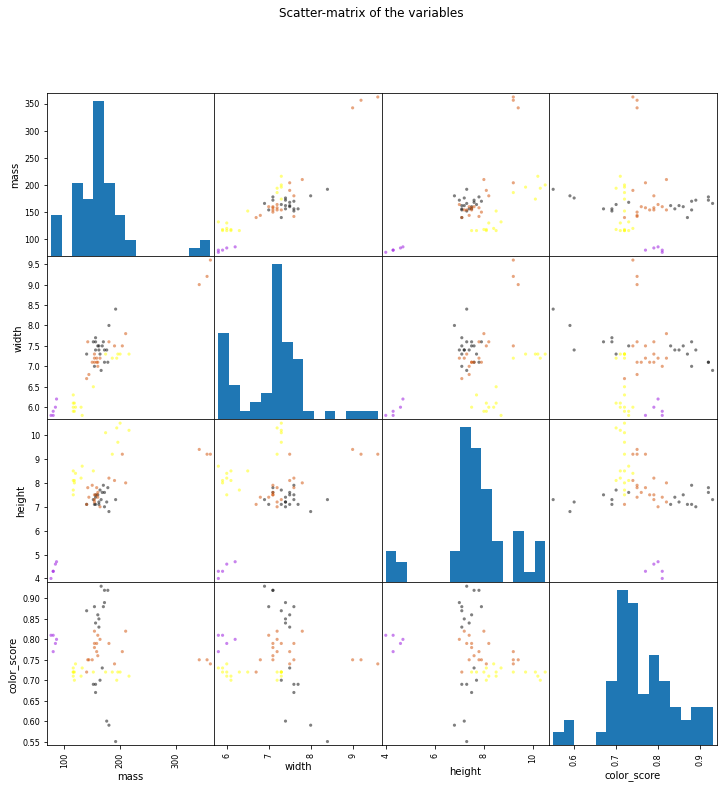

In [8]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')

s_m = pd.plotting.scatter_matrix(X, c = y, s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)
plt.suptitle('Scatter-matrix of the variables')
#plt.savefig('fruits_scatter_matrix')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
print("Total size: ", fruits.shape[0])
print("Train size: ", X_train.shape, y_train.shape)
print("Test size: ", X_test.shape, y_test.shape)

Total size:  59
Train size:  (41, 4) (41,)
Test size:  (18, 4) (18,)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
def Predictive_Model(model):
    estimator = model
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)
    print('Accuracy on training set: {:.2f}'.format(estimator.score(X_train, y_train)))
    print('Accuracy on test set: {:.2f}'.format(estimator.score(X_test, y_test)))
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
Predictive_Model(lr)

Accuracy on training set: 0.73
Accuracy on test set: 0.44
[[4 0 0 0]
 [2 0 0 0]
 [7 0 1 1]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       0.31      1.00      0.47         4
           2       0.00      0.00      0.00         2
           3       1.00      0.11      0.20         9
           4       0.75      1.00      0.86         3

    accuracy                           0.44        18
   macro avg       0.51      0.53      0.38        18
weighted avg       0.69      0.44      0.35        18



In [18]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
Predictive_Model(dt)

Accuracy on training set: 1.00
Accuracy on test set: 0.89
[[4 0 0 0]
 [0 2 0 0]
 [2 0 7 0]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         2
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00         3

    accuracy                           0.89        18
   macro avg       0.92      0.94      0.92        18
weighted avg       0.93      0.89      0.89        18



In [19]:
#RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
Predictive_Model(rfc)

Accuracy on training set: 1.00
Accuracy on test set: 0.89
[[4 0 0 0]
 [0 2 0 0]
 [1 0 7 1]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         2
           3       1.00      0.78      0.88         9
           4       0.75      1.00      0.86         3

    accuracy                           0.89        18
   macro avg       0.89      0.94      0.91        18
weighted avg       0.91      0.89      0.89        18



In [20]:
#XGBOOST
import xgboost
xgb = xgboost.XGBClassifier() 
Predictive_Model(xgb)

[16:41:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set: 1.00
Accuracy on test set: 0.83
[[4 0 0 0]
 [0 2 0 0]
 [0 0 6 3]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         9
           4       0.50      1.00      0.67         3

    accuracy                           0.83        18
   macro avg       0.88      0.92      0.87        18
weighted avg       0.92      0.83      0.84        18



In [21]:
#Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
Predictive_Model(gnb)

Accuracy on training set: 0.88
Accuracy on test set: 0.67
[[4 0 0 0]
 [0 2 0 0]
 [5 0 3 1]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       0.44      1.00      0.62         4
           2       1.00      1.00      1.00         2
           3       1.00      0.33      0.50         9
           4       0.75      1.00      0.86         3

    accuracy                           0.67        18
   macro avg       0.80      0.83      0.74        18
weighted avg       0.83      0.67      0.64        18



In [24]:
#SVM
from sklearn.svm import SVC
svm = SVC()
Predictive_Model(svm)

Accuracy on training set: 0.90
Accuracy on test set: 0.61
[[4 0 0 0]
 [0 2 0 0]
 [6 0 2 1]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         4
           2       1.00      1.00      1.00         2
           3       1.00      0.22      0.36         9
           4       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.79      0.81      0.70        18
weighted avg       0.82      0.61      0.56        18



In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Predictive_Model(knn)

Accuracy on training set: 0.95
Accuracy on test set: 1.00
[[4 0 0 0]
 [0 2 0 0]
 [0 0 9 0]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'accuracy')

([<matplotlib.axis.XTick at 0x287c25e8490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

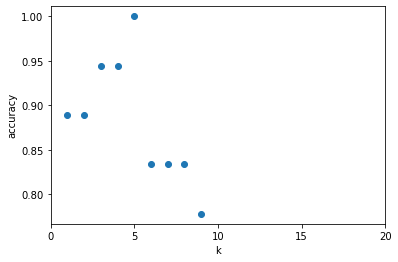

In [23]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [25]:
# ##to bo done: plot the decision boundary
# import matplotlib.pylab as pyb
# from matplotlib.colors import ListedColormap

# lc = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
# lc2  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

# y_ = knn.predict(X_test)

# %%time

#pyb.scatter


In [ ]:
# usig cross-validation